# *Predicting Diseases from Symptoms*

#### Importing Libraries

In [245]:
# Importing Libraries
import pandas as pd
import csv
from collections import defaultdict

## *Data Wrangling*

### Gathering Data

#### Data is taken from this [Source.](http://people.dbmi.columbia.edu/~friedma/Projects/DiseaseSymptomKB/index.html)

***To use this data, copy the whole table present on the link provided above and save it in csv format as `Data_Uncleaned.csv`***

### Cleaning Data

In [246]:
# Creating a disease list
disease_list = []

# CLeaning timestamp
def return_list(disease):
    disease_list = []
    # splitting the timestamp and disease and Replacing character with underscore 
    match = disease.replace('^','_').split('_')
    
    # Since timestamp is on odd positions
    c = 1
    for group in match:
        # Only taking disease located at even positions
        if c % 2 == 0:
            disease_list.append(group)
        c = c + 1
    return disease_list

# Opening the csv file
with open("Data/uncleaned_data.csv") as csvfile:
    reader = csv.reader(csvfile)
    
    disease = ""
    
    weight = 0
    disease_list = []
    dict_wt = {}
    
    diction = defaultdict(list)
    
    # Disease is in first row
    # Weights are in second row
    # Symptoms are in third row
    
    for row in reader:
        if row[0] != "\xc2\xa0" and row[0] != "":
            disease = row[0]
            disease_list = return_list(disease)
            weight = row[1]

        if row[2]!="\xc2\xa0" and row[2]!="":
            symptom_list = return_list(row[2])

            for d in disease_list:
                for s in symptom_list:
                    diction[d].append(s)
                dict_wt[d] = weight
#print(diction)

In [247]:
# Storing Scraped Data
with open("Data/clean_data.csv","w") as csvfile:
    writer = csv.writer(csvfile)
    for key,values in diction.items():
        for v in values:
            #key = str.encode(key)
            key = str.encode(key).decode('utf-8')
            #.strip()
            #v = v.encode('utf-8').strip()
            #v = str.encode(v)
            writer.writerow([key,v,dict_wt[key]])

In [248]:
# Column Names
columns = ['Source','Target','Weight']

In [249]:
# Loading Scraped Data
data = pd.read_csv("Data/clean_data.csv",names = columns, encoding ="ISO-8859-1")

In [250]:
# Initial Data
data.head()

Source               Target  Weight
0  hypertensive disease           pain chest    3363
1  hypertensive disease  shortness of breath    3363
2  hypertensive disease            dizziness    3363
3  hypertensive disease             asthenia    3363
4  hypertensive disease                 fall    3363

In [251]:
# Storing data to machine
data.to_csv("Data/clean_data.csv",index = False)

In [252]:
# slist is symptoms list
# dlist is disease list
slist = []
dlist = []

with open("Data/attributes.csv","w") as csvfile:
    writer = csv.writer(csvfile)
    for key,values in diction.items():
        for v in values:
            if v not in slist:
                writer.writerow([v,v,"symptom"])
                slist.append(v)
        if key not in dlist:
            writer.writerow([key,key,"disease"])
            dlist.append(key)

In [253]:
# Column names
at_columns = ['Id','Label','Attribute']

In [254]:
# Loading Label and attribute data
at_data = pd.read_csv("Data/attributes.csv",names = at_columns, encoding = "ISO-8859-1",)

In [255]:
# First few Rows
at_data.head()

Id                Label Attribute
0           pain chest           pain chest   symptom
1  shortness of breath  shortness of breath   symptom
2            dizziness            dizziness   symptom
3             asthenia             asthenia   symptom
4                 fall                 fall   symptom

In [256]:
at_data.to_csv("Data/attributes.csv",index = False)

## *Analyzing Data*

In [257]:
data = pd.read_csv("Data/clean_data.csv", encoding = "ISO-8859-1")

In [258]:
data.head()

Source               Target  Weight
0  hypertensive disease           pain chest    3363
1  hypertensive disease  shortness of breath    3363
2  hypertensive disease            dizziness    3363
3  hypertensive disease             asthenia    3363
4  hypertensive disease                 fall    3363

In [259]:
# Unique Diseases
len(data['Source'].unique())

149

In [260]:
# Unique Target areas
len(data['Target'].unique())

405

In [261]:
# Creating data frame
df = pd.DataFrame(data)

In [262]:
# Creating dummy variables or data
df1 = pd.get_dummies(df.Target)

In [263]:
df1.head()

Heberden's node  Murphy's sign  Stahli's line  abdomen acute  \
0                0              0              0              0   
1                0              0              0              0   
2                0              0              0              0   
3                0              0              0              0   
4                0              0              0              0   

   abdominal bloating  abdominal tenderness  abnormal sensation  \
0                   0                     0                   0   
1                   0                     0                   0   
2                   0                     0                   0   
3                   0                     0                   0   
4                   0                     0                   0   

   abnormally hard consistency  abortion  abscess bacterial  ...  \
0                            0         0                  0  ...   
1                            0         0                  0  ...   
2                            0         0                  0  ...   
3                            0         0                  0  ...   
4                            0         0                  0  ...   

   vision blurred  vomiting  weepiness  weight gain  welt  wheelchair bound  \
0               0         0          0            0     0                 0   
1               0         0          0            0     0                 0   
2               0         0          0            0     0                 0   
3               0         0          0            0     0                 0   
4               0         0          0            0     0                 0   

   wheezing  withdraw  worry  yellow sputum  
0         0         0      0              0  
1         0         0      0              0  
2         0         0      0              0  
3         0         0      0              0  
4         0         0      0              0  

[5 rows x 404 columns]

In [264]:
# Data of source
dfs = df['Source']

In [265]:
# Pivoted data according to source data
df_pivoted = pd.concat([dfs, df1], axis = 1)

In [266]:
# Dropping Duplicates
df_pivoted.drop_duplicates(keep = 'first',inplace = True)

In [267]:
df_pivoted.head()

Source  Heberden's node  Murphy's sign  Stahli's line  \
0  hypertensive disease                0              0              0   
1  hypertensive disease                0              0              0   
2  hypertensive disease                0              0              0   
3  hypertensive disease                0              0              0   
4  hypertensive disease                0              0              0   

   abdomen acute  abdominal bloating  abdominal tenderness  \
0              0                   0                     0   
1              0                   0                     0   
2              0                   0                     0   
3              0                   0                     0   
4              0                   0                     0   

   abnormal sensation  abnormally hard consistency  abortion  ...  \
0                   0                            0         0  ...   
1                   0                            0         0  ...   
2                   0                            0         0  ...   
3                   0                            0         0  ...   
4                   0                            0         0  ...   

   vision blurred  vomiting  weepiness  weight gain  welt  wheelchair bound  \
0               0         0          0            0     0                 0   
1               0         0          0            0     0                 0   
2               0         0          0            0     0                 0   
3               0         0          0            0     0                 0   
4               0         0          0            0     0                 0   

   wheezing  withdraw  worry  yellow sputum  
0         0         0      0              0  
1         0         0      0              0  
2         0         0      0              0  
3         0         0      0              0  
4         0         0      0              0  

[5 rows x 405 columns]

In [268]:
# Length of new data
len(df_pivoted)

2116

In [269]:
# Column names
cols = df_pivoted.columns

In [270]:
# Selecting column names for later reference
cols = cols[1:]

In [271]:
# Grouping by source that is disease
df_pivoted = df_pivoted.groupby('Source').sum()
df_pivoted = df_pivoted.reset_index()
df_pivoted.head()

Source  Heberden's node  Murphy's sign  \
0                   Alzheimer's disease                0              0   
1                                   HIV                0              0   
2      PneumocystisÂ cariniiÂ pneumonia                0              0   
3             accidentÂ cerebrovascular                0              0   
4  acquiredÂ immuno-deficiency syndrome                0              0   

   Stahli's line  abdomen acute  abdominal bloating  abdominal tenderness  \
0              0              0                   0                     0   
1              0              0                   0                     0   
2              0              0                   0                     0   
3              0              0                   0                     0   
4              0              0                   0                     0   

   abnormal sensation  abnormally hard consistency  abortion  ...  \
0                   0                            0         0  ...   
1                   0                            0         0  ...   
2                   0                            0         0  ...   
3                   0                            0         0  ...   
4                   0                            0         0  ...   

   vision blurred  vomiting  weepiness  weight gain  welt  wheelchair bound  \
0               0         0          0            0     0                 1   
1               0         0          0            0     0                 0   
2               0         0          0            0     0                 0   
3               0         0          0            0     0                 0   
4               0         0          0            0     0                 0   

   wheezing  withdraw  worry  yellow sputum  
0         0         0      0              0  
1         0         0      0              0  
2         0         0      0              1  
3         0         0      0              0  
4         0         0      0              0  

[5 rows x 405 columns]

In [272]:
# Back to normal according to diseases
len(df_pivoted)

149

In [273]:
# Storing pivoted data
df_pivoted.to_csv("Data/df_pivoted.csv")

In [274]:
# x will be symptoms
# y will be disease

x = df_pivoted[cols]
y = df_pivoted['Source']

## *Machine Learning*

In [275]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

# Checking Multinomial Naive Bayes since data is discrete
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split

In [276]:
# Splitting data into training and testing
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.33, random_state = 42)

In [277]:
clf = MultinomialNB()
clf = clf.fit(x_train, y_train)

In [278]:
# Mean accuracy
clf.score(x_test, y_test)

0.0

### Inferences on above Procedure

Above method performed is useless as our model has not seen data as our data has no information on diseases just symptoms corresponding to it. We need to train the model entirely, so that we have all the variables covered. But then we dont have testing data.

In [279]:
clf_tot = MultinomialNB()
clf_tot = clf_tot.fit(x, y)

In [280]:
# Mean training Accuracy
clf_tot.score(x, y)

0.8993288590604027

In [281]:
# Let's predict on x
disease_pred = clf_tot.predict(x)

In [282]:
disease_real = y.values

In [283]:
# Verification
for i in range(0, len(disease_real)):
    if disease_pred[i] != disease_real[i]:
        print ('Predcted: {0} ,:, Actual:{1}'.format(disease_pred[i], disease_real[i]))

Predcted: HIV ,:, Actual:acquiredÂ immuno-deficiency syndrome
Predcted: biliary calculus ,:, Actual:cholelithiasis
Predcted: coronary arteriosclerosis ,:, Actual:coronary heart disease
Predcted: depression mental ,:, Actual:depressive disorder
Predcted: HIV ,:, Actual:hiv infections
Predcted: carcinoma breast ,:, Actual:malignant neoplasm of breast
Predcted: carcinoma of lung ,:, Actual:malignant neoplasm of lung
Predcted: carcinoma prostate ,:, Actual:malignant neoplasm of prostate
Predcted: carcinoma colon ,:, Actual:malignant tumor of colon
Predcted: candidiasis ,:, Actual:oralcandidiasis
Predcted: effusion pericardial ,:, Actual:pericardial effusion body substance
Predcted: malignant neoplasms ,:, Actual:primary malignant neoplasm
Predcted: sepsis (invertebrate) ,:, Actual:septicemia
Predcted: sepsis (invertebrate) ,:, Actual:systemic infection
Predcted: tonic-clonic epilepsy ,:, Actual:tonic-clonic seizures


#### *Decision Trees and Random Forests might be a good idea as data mainly depends on binary values*

### Decision Tree

In [284]:
# Importing Libraries
from sklearn.tree import DecisionTreeClassifier

In [285]:
dt = DecisionTreeClassifier()
clf_dt = dt.fit(x,y)
print ("Decision Tree Acurracy: ", clf_dt.score(x,y))

Decision Tree Acurracy:  0.8993288590604027


In [287]:
from IPython.display import Image
Image(filename = 'tree.png')

In [288]:
# Imported self created Test data for machine learning
data = pd.read_csv("Model_Data/Training.csv")

In [289]:
# First five rows
data.head()

itching  skin_rash  nodal_skin_eruptions  continuous_sneezing  shivering  \
0        1          1                     1                    0          0   
1        0          1                     1                    0          0   
2        1          0                     1                    0          0   
3        1          1                     0                    0          0   
4        1          1                     1                    0          0   

   chills  joint_pain  stomach_pain  acidity  ulcers_on_tongue  ...  \
0       0           0             0        0                 0  ...   
1       0           0             0        0                 0  ...   
2       0           0             0        0                 0  ...   
3       0           0             0        0                 0  ...   
4       0           0             0        0                 0  ...   

   blackheads  scurring  skin_peeling  silver_like_dusting  \
0           0         0             0                    0   
1           0         0             0                    0   
2           0         0             0                    0   
3           0         0             0                    0   
4           0         0             0                    0   

   small_dents_in_nails  inflammatory_nails  blister  red_sore_around_nose  \
0                     0                   0        0                     0   
1                     0                   0        0                     0   
2                     0                   0        0                     0   
3                     0                   0        0                     0   
4                     0                   0        0                     0   

   yellow_crust_ooze         prognosis  
0                  0  Fungal infection  
1                  0  Fungal infection  
2                  0  Fungal infection  
3                  0  Fungal infection  
4                  0  Fungal infection  

[5 rows x 133 columns]

In [290]:
# Column names
print(data.columns)

Index(['itching', 'skin_rash', 'nodal_skin_eruptions', 'continuous_sneezing',
       'shivering', 'chills', 'joint_pain', 'stomach_pain', 'acidity',
       'ulcers_on_tongue',
       ...
       'blackheads', 'scurring', 'skin_peeling', 'silver_like_dusting',
       'small_dents_in_nails', 'inflammatory_nails', 'blister',
       'red_sore_around_nose', 'yellow_crust_ooze', 'prognosis'],
      dtype='object', length=133)


In [291]:
# Length of model data
len(data.columns)

133

In [292]:
# Creating dataframe
df = pd.DataFrame(data)

In [293]:
# First few rows
df.head()

itching  skin_rash  nodal_skin_eruptions  continuous_sneezing  shivering  \
0        1          1                     1                    0          0   
1        0          1                     1                    0          0   
2        1          0                     1                    0          0   
3        1          1                     0                    0          0   
4        1          1                     1                    0          0   

   chills  joint_pain  stomach_pain  acidity  ulcers_on_tongue  ...  \
0       0           0             0        0                 0  ...   
1       0           0             0        0                 0  ...   
2       0           0             0        0                 0  ...   
3       0           0             0        0                 0  ...   
4       0           0             0        0                 0  ...   

   blackheads  scurring  skin_peeling  silver_like_dusting  \
0           0         0             0                    0   
1           0         0             0                    0   
2           0         0             0                    0   
3           0         0             0                    0   
4           0         0             0                    0   

   small_dents_in_nails  inflammatory_nails  blister  red_sore_around_nose  \
0                     0                   0        0                     0   
1                     0                   0        0                     0   
2                     0                   0        0                     0   
3                     0                   0        0                     0   
4                     0                   0        0                     0   

   yellow_crust_ooze         prognosis  
0                  0  Fungal infection  
1                  0  Fungal infection  
2                  0  Fungal infection  
3                  0  Fungal infection  
4                  0  Fungal infection  

[5 rows x 133 columns]

In [294]:
# Length of data
len(df)

4920

In [295]:
# Column names
cols = df.columns

In [296]:
# All col names except disease
cols = cols[:-1]

In [297]:
cols

Index(['itching', 'skin_rash', 'nodal_skin_eruptions', 'continuous_sneezing',
       'shivering', 'chills', 'joint_pain', 'stomach_pain', 'acidity',
       'ulcers_on_tongue',
       ...
       'pus_filled_pimples', 'blackheads', 'scurring', 'skin_peeling',
       'silver_like_dusting', 'small_dents_in_nails', 'inflammatory_nails',
       'blister', 'red_sore_around_nose', 'yellow_crust_ooze'],
      dtype='object', length=132)

In [298]:
# Printing cols which are symptoms
len(cols)

132

We have 132 symptoms in the manual data.

In [299]:
# Initialising x and y variables
x = df[cols]
y = df['prognosis']

### *Decision Tree on Model Data*

In [300]:
from sklearn.tree import DecisionTreeClassifier

In [301]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.33, random_state = 42)

In [302]:
dt = DecisionTreeClassifier()
clf_dt = dt.fit(x_train,y_train)
print ("Decision Tree Acurracy: ", clf_dt.score(x_test,y_test))

Decision Tree Acurracy:  1.0


In [303]:
from sklearn.model_selection import cross_val_score
print ("Cross Validation Result")
scores = cross_val_score(dt, x_test, y_test, cv=3)
print (scores)
print (scores.mean())

Cross Validation Result
[0.96863469 0.97597043 0.97227357]
0.9722928929843827


In [304]:
print ("Acurracy on the actual test data: ", clf_dt.score(x_test,y_test))

Acurracy on the actual test data:  1.0


In [306]:
from IPython.display import Image
Image(filename = 'tree.png')

In [307]:
# Getting decision tree
dt.__getstate__()

{'criterion': 'gini',
 'splitter': 'best',
 'max_depth': None,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'min_weight_fraction_leaf': 0.0,
 'max_features': None,
 'max_leaf_nodes': None,
 'random_state': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'class_weight': None,
 'presort': 'deprecated',
 'ccp_alpha': 0.0,
 'n_features_in_': 132,
 'n_features_': 132,
 'n_outputs_': 1,
 'classes_': array(['(vertigo) Paroymsal  Positional Vertigo', 'AIDS', 'Acne',
        'Alcoholic hepatitis', 'Allergy', 'Arthritis', 'Bronchial Asthma',
        'Cervical spondylosis', 'Chicken pox', 'Chronic cholestasis',
        'Common Cold', 'Dengue', 'Diabetes ',
        'Dimorphic hemmorhoids(piles)', 'Drug Reaction',
        'Fungal infection', 'GERD', 'Gastroenteritis', 'Heart attack',
        'Hepatitis B', 'Hepatitis C', 'Hepatitis D', 'Hepatitis E',
        'Hypertension ', 'Hyperthyroidism', 'Hypoglycemia',
        'Hypothyroidism', 'Impetigo', 'Jaundice', 'Malaria', 'Migr

#### *Feature Importances*

In [308]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

importances = dt.feature_importances_
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Ranking Features")
features = cols
for f in range(5):
    print("%d. feature %d - %s (%f)" % (f + 1, indices[f], features[indices[f]] ,importances[indices[f]]))

Ranking Features
1. feature 52 - redness_of_eyes (0.026703)
2. feature 93 - internal_itching (0.026649)
3. feature 79 - hip_joint_pain (0.026626)
4. feature 105 - polyuria (0.026390)
5. feature 128 - inflammatory_nails (0.025712)


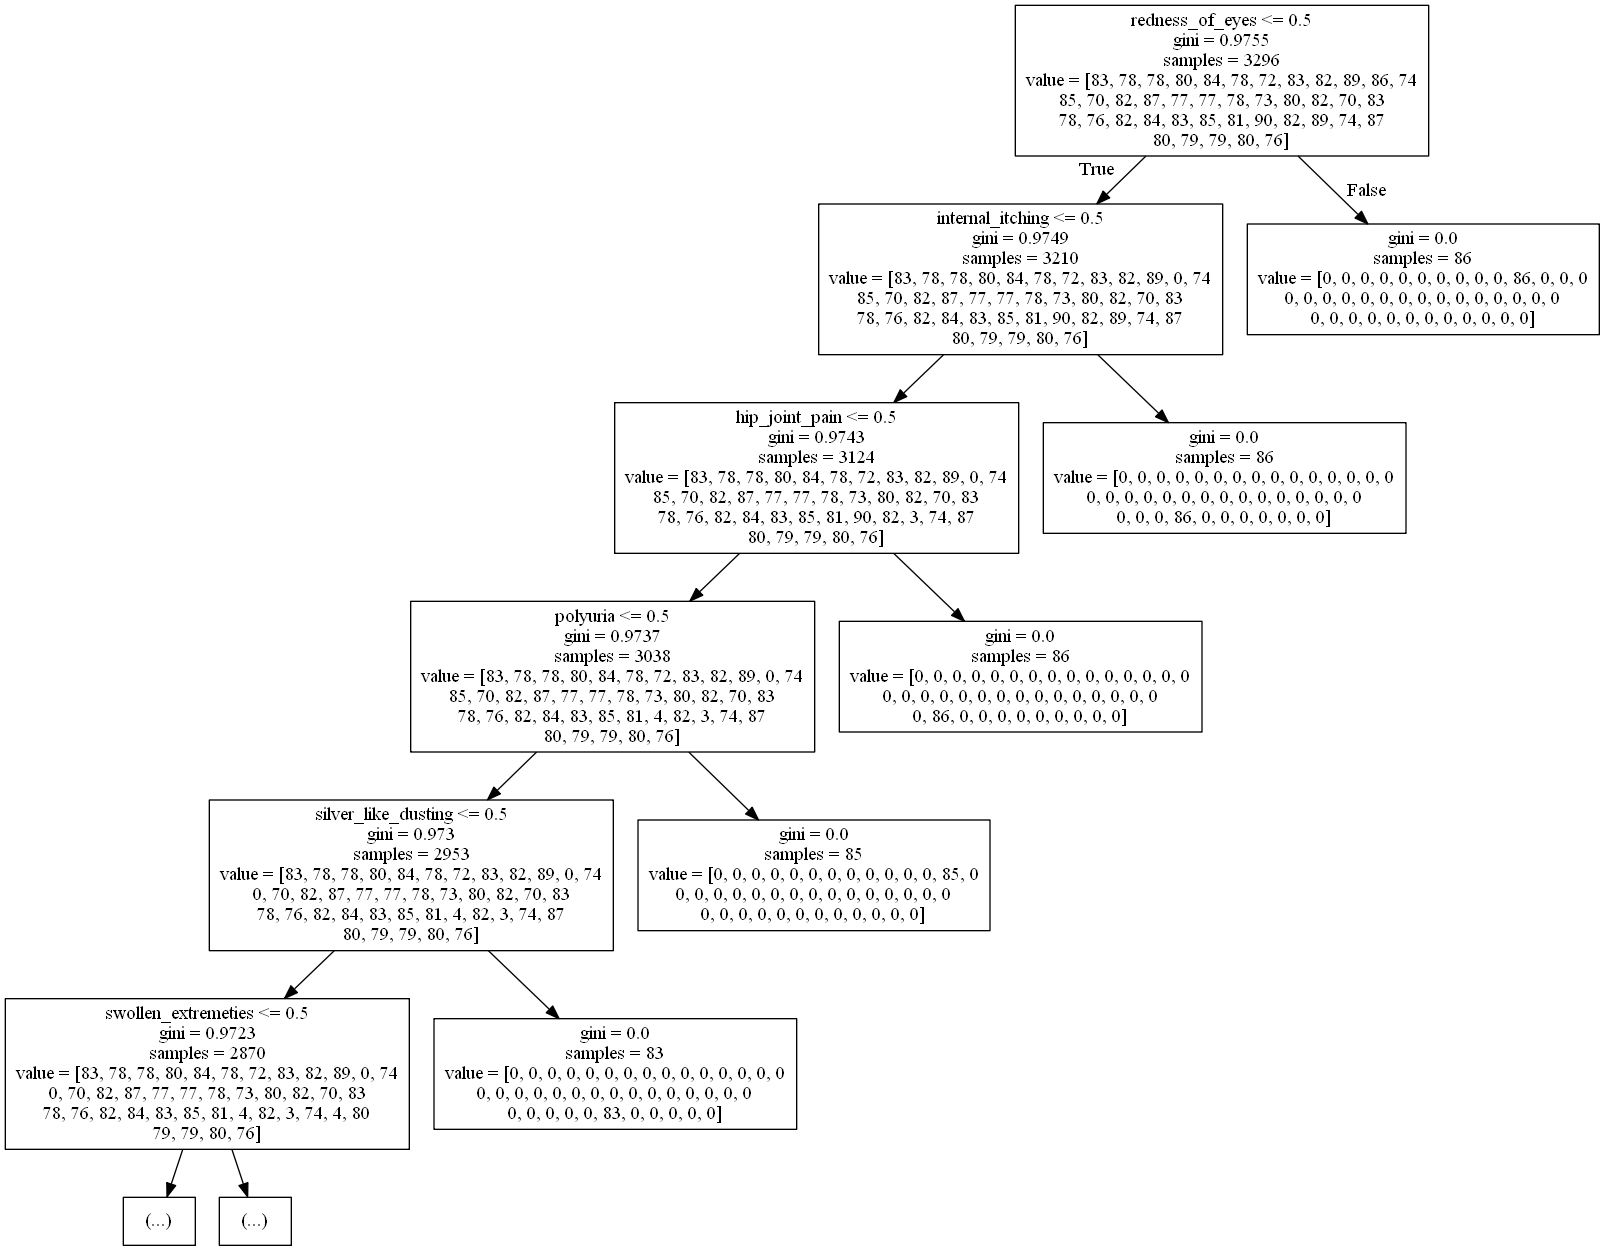

In [310]:
# Top Five features decision tree
from IPython.display import Image
Image(filename = 'tree-top5.png')

The ``redness_of_eyes`` is the top symptom that has the highest ***[Gini Impurity](https://en.wikipedia.org/wiki/Decision_tree_learning#Gini_impurity)* score of 0.9755.** Then, comes internal_itchiness with a **score of 0.9749** and so on.

In [311]:
# Feature dictionary
feature_dict = {}
for i,f in enumerate(features):
    feature_dict[f] = i

In [312]:
feature_dict['redness_of_eyes']

52

In [313]:
sample_x = [i // 52 if i == 52 else i * 0 for i in range(len(features))]

***Predicting the disease where the only symptom is `redness_of_eyes.`***

In [314]:
# Length of sample
len(sample_x)

132

In [315]:
# Reshaping
sample_x = np.array(sample_x).reshape(1, len(sample_x))

In [316]:
dt.predict(sample_x)

array(['Common Cold'], dtype=object)

In [317]:
dt.predict_proba(sample_x)

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0.]])

***Hence, it is predicted it is common cold and it will work more optimally if trained on more data.***